In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("50_Startups.csv")

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [34]:
estados = {
    "New York": 1,
    "California": 2,
    "Florida": 3
}

In [35]:
df['State'] = df['State'].map(estados)

In [36]:
X = df[["R&D Spend","Administration", "Marketing Spend", "State"]]
y = df[["Profit"]]

In [37]:
# Criar variáveis de treino e teste:
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# Criando o modelo:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
df.loc[0]

R&D Spend          165349.20
Administration     136897.80
Marketing Spend    471784.10
State                   1.00
Profit             192261.83
Name: 0, dtype: float64

In [45]:
RD_Spend = 165349.20
Administration = 136897.80	
Marketing_Spend = 471784.10
State = 1	

previsao = model.predict([[RD_Spend, Administration, Marketing_Spend, State]])
f"Previsão: {previsao}"

c:\Users\alzir\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'Previsão: [[192197.12363986]]'

In [46]:
import statsmodels.api as sm

In [47]:
features = ["R&D Spend","Administration", "Marketing Spend", "State"]

X = sm.add_constant(df[features])
y = df['Profit']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 22 Jan 2025   Prob (F-statistic):           8.49e-29
Time:                        19:55:01   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.993e+04   7182.620      6.951      0.000    3.55e+04    6.44e+04
R&D Spend           0.8060      0.046     17.569      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.602      0.116      -0.007       0.061
State             118.5147   1649.478      0.072      0.943   -3203.704    3440.733
==============================================================================
Omnibus:                       14.842   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.489
Skew:                          -0.948   Prob(JB):                     2.16e-05
Kurtosis:                       5.592   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
RD_Spend = 165349.20
Administration = 136897.80	
Marketing_Spend = 471784.10
State = 1	

Expr = 49930 + (0.8060 * RD_Spend) + (-0.0270 * Administration) + (0.0270 * Marketing_Spend) + (118.5147 * State)

In [92]:
df.loc[0]['Profit']

np.float64(192261.83)

In [98]:
f"$ Predição: {Expr:.2f}"

'$ Predição: 192361.90'

In [99]:
f"$ {Expr:.2f} - {df.loc[0]['Profit']} = {Expr - df.loc[0]['Profit']:.2f}"

'$ 192361.90 - 192261.83 = 100.07'

In [70]:
import seaborn as sns

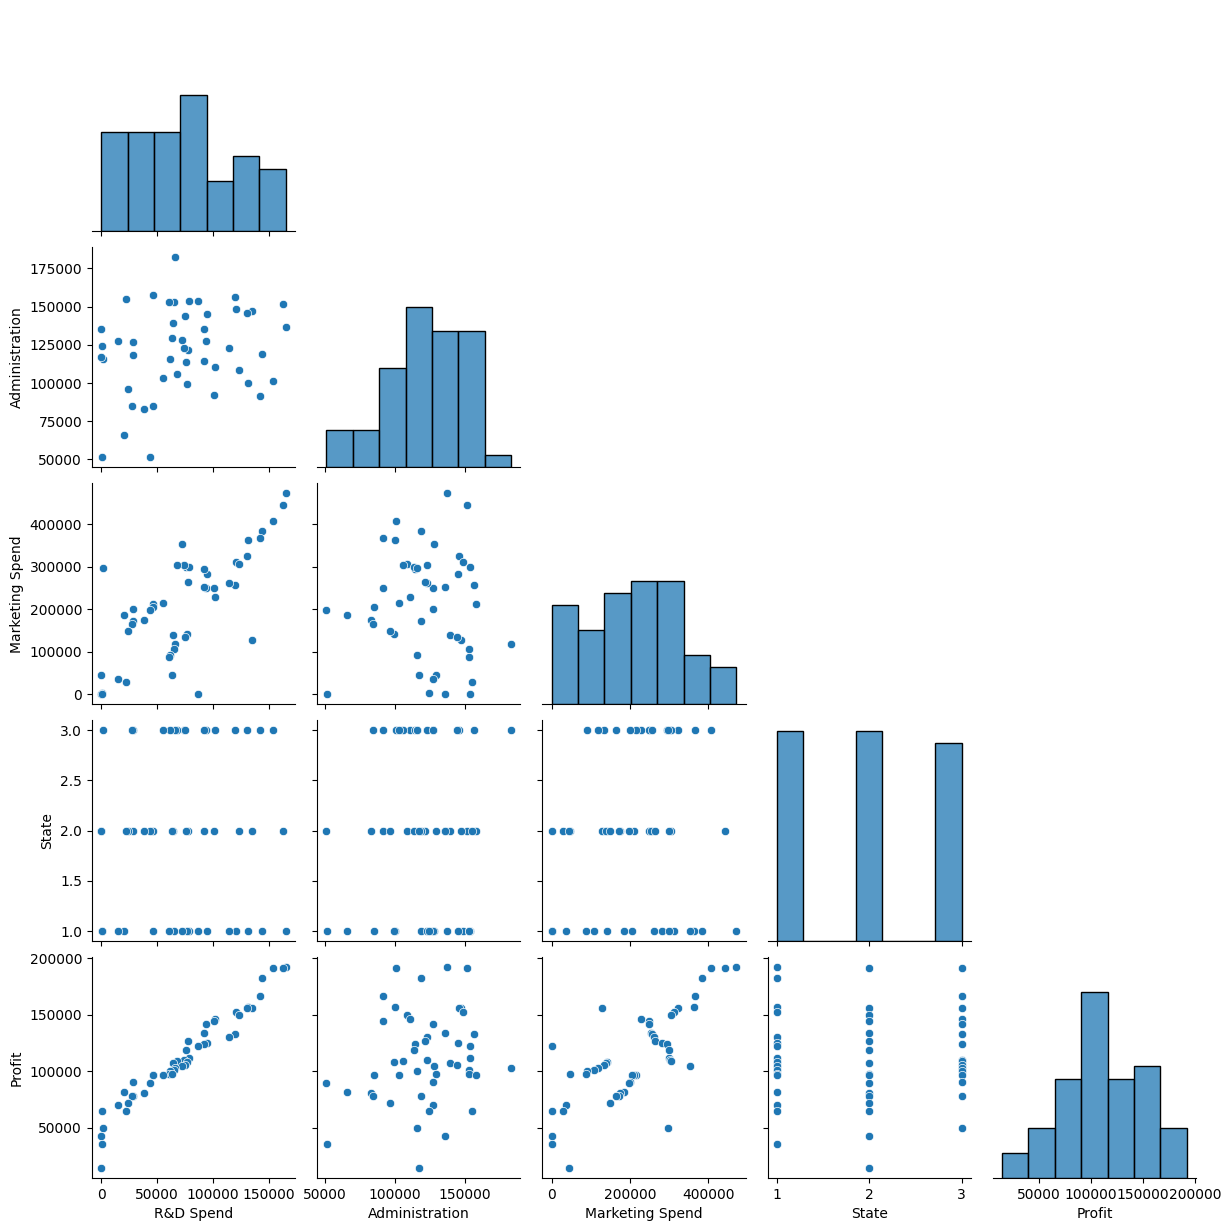

In [73]:
sns.pairplot(df, corner=True)

<Axes: >

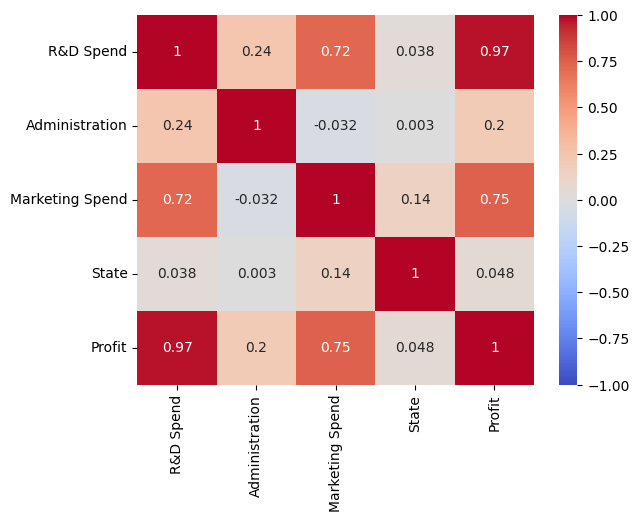

In [77]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmax=1, vmin=-1, cmap='coolwarm')

<Axes: xlabel='R&D Spend', ylabel='Marketing Spend'>

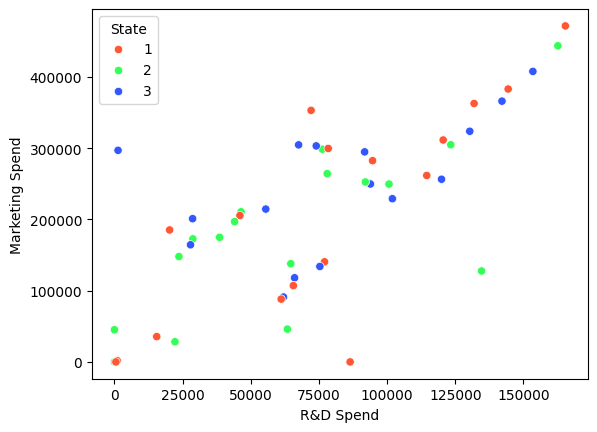

In [90]:
custom_palette = ["#FF5733", "#33FF57", "#3357FF"]
sns.scatterplot(df, x='R&D Spend', y='Marketing Spend', hue='State', palette=custom_palette)

In [91]:
import pickle